In [1]:
#IMPORTNG ESSENTIAL PACKAGES
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

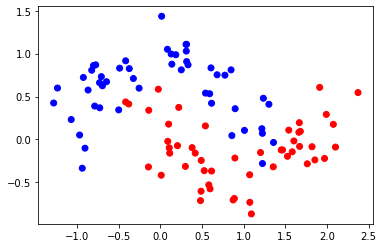

In [40]:
#2D - PLOTS
x_train, y_train = make_moons(noise=0.2)
x_valid, y_valid = make_moons(noise=0.2)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='bwr')

In [63]:
#TRYING WITH 3 AND OBSERVING THE DATA
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(x_train)
print(kmeans.cluster_centers_)
print(kmeans.predict(x_train))

[[ 1.62486685  0.02864091]
 [-0.41611159  0.66649563]
 [ 0.55609347 -0.0816132 ]]
[2 1 2 2 1 1 0 2 0 1 2 0 1 0 2 2 2 1 1 2 0 1 1 0 2 2 2 0 2 2 0 0 0 1 1 2 1
 0 1 1 0 2 1 0 1 2 1 2 0 0 1 2 2 0 0 0 2 1 2 1 2 0 1 1 2 1 2 1 0 0 2 2 1 1
 2 2 2 0 2 1 0 0 2 1 1 1 2 0 0 0 2 1 1 1 2 1 1 1 1 1]


In [64]:

x0_values = np.linspace(-1.5, 2.5, 100)
x1_values = np.linspace(-1, 1.5, 100)
coords = np.asarray(np.meshgrid(x0_values, x1_values)).T.reshape(-1,2)
coords

array([[-1.5       , -1.        ],
       [-1.5       , -0.97474747],
       [-1.5       , -0.94949495],
       ...,
       [ 2.5       ,  1.44949495],
       [ 2.5       ,  1.47474747],
       [ 2.5       ,  1.5       ]])

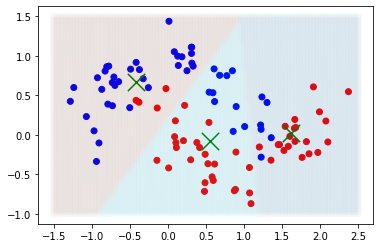

In [65]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='bwr')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='g', marker='x', s=300)
plt.scatter(coords[:,0], coords[:,1], c=kmeans.predict(coords), cmap='tab10',alpha=0.02) 

In [66]:
cluster_y = {}
for i in range(k):
    counts = Counter(y_train[kmeans.labels_==i])
    label = counts.most_common()[0][0]
    cluster_y[i] = label
cluster_y

{0: 1, 1: 0, 2: 1}

In [67]:
preds_train = [cluster_y[el] for el in kmeans.predict(x_train)]
train_acc = accuracy_score(y_train, preds_train)

preds_valid = [cluster_y[el] for el in kmeans.predict(x_valid)]
valid_acc = accuracy_score(y_valid, preds_valid)

print(train_acc, valid_acc)

0.8 0.77


In [53]:
for k in range(2, 20):
    # Do clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_train)
    
    # Map which label each cluster is 
    cluster_y = {}
    for i in range(k):
        counts = Counter(y_train[kmeans.labels_==i])
        label = counts.most_common()[0][0]
        cluster_y[i] = label
    
    # Evaluate results
    preds_train = [cluster_y[el] for el in kmeans.predict(x_train)]
    train_acc = accuracy_score(y_train, preds_train)

    preds_valid = [cluster_y[el] for el in kmeans.predict(x_valid)]
    valid_acc = accuracy_score(y_valid, preds_valid)

    print(k, train_acc, valid_acc)

2 0.74 0.75
3 0.8 0.77
4 0.87 0.85
5 0.89 0.89
6 0.92 0.94
7 0.93 0.89
8 0.89 0.84
9 0.89 0.83
10 0.92 0.93
11 0.94 0.94
12 0.94 0.94
13 0.91 0.93
14 0.92 0.9
15 0.95 0.98
16 0.94 0.95
17 0.94 0.95
18 0.95 0.95
19 0.93 0.94


In [54]:
# Do clustering
k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(x_train)

# Map which label each cluster is 
cluster_y = {}
for i in range(k):
    counts = Counter(y_train[kmeans.labels_==i])
    label = counts.most_common()[0][0]
    cluster_y[i] = label

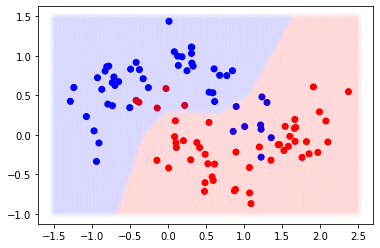

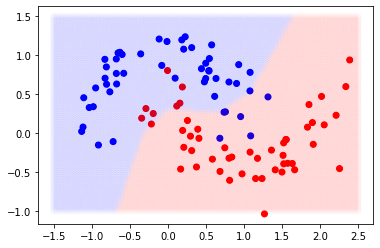

In [55]:
preds_coords = [cluster_y[el] for el in kmeans.predict(coords)]
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='bwr')
plt.scatter(coords[:,0], coords[:,1], c=preds_coords, cmap='bwr', alpha=0.02)
plt.show()

plt.scatter(x_valid[:,0], x_valid[:,1], c=y_valid, cmap='bwr')
plt.scatter(coords[:,0], coords[:,1], c=preds_coords, cmap='bwr', alpha=0.02)
plt.show()

In [60]:
# Do clustering
k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(x_train)

# Map which label each cluster is 
cluster_y = {}
for i in range(k):
    counts = Counter(y_train[kmeans.labels_==i])
    label = counts.most_common()[0][0]
    cluster_y[i] = label

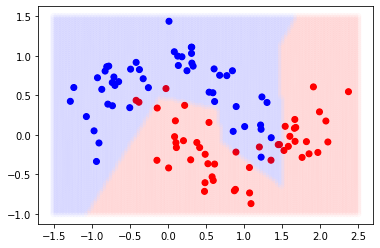

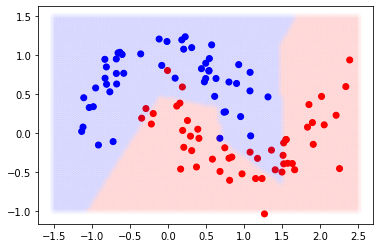

In [61]:
preds_coords = [cluster_y[el] for el in kmeans.predict(coords)]
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='bwr')
plt.scatter(coords[:,0], coords[:,1], c=preds_coords, cmap='bwr', alpha=0.02)
plt.show()

plt.scatter(x_valid[:,0], x_valid[:,1], c=y_valid, cmap='bwr')
plt.scatter(coords[:,0], coords[:,1], c=preds_coords, cmap='bwr', alpha=0.02)

0.94


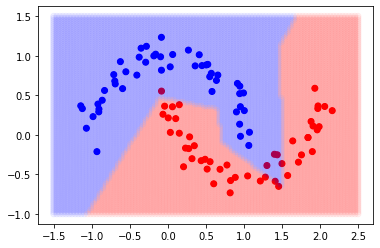

In [62]:
x_test, y_test = make_moons(noise=0.1)
preds_test = [cluster_y[el] for el in kmeans.predict(x_test)]
test_acc = accuracy_score(y_test, preds_test)
print(test_acc)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap='bwr')
plt.scatter(coords[:,0], coords[:,1], c=preds_coords, cmap='bwr', alpha=0.05)

In [ ]:
#TRIED THE MODEL WITH MULTIPLE VALUES OF K, BUT THE BEST ONE IS WHEN K = 6 WITH 94% ACCURACY